# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [13]:
# Import your libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [14]:
# Your code here:
dataset = load_diabetes(as_frame=True)
print(type(dataset))
dataset

<class 'sklearn.utils._bunch.Bunch'>


{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [15]:
# Your code here:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [16]:
# Your code here:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

What are the variables in this dataset according to the description? List them in the markdown cell below

#### Enter your answer here:

- age     age in years
- sex
- bmi     body mass index
- bp      average blood pressure
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL
- s5      ltg, possibly log of serum triglycerides level
- s6      glu, blood sugar level

Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [17]:
# Your code here:
data = dataset['data']
print(data)
print(type(data))
data.shape

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

(442, 10)

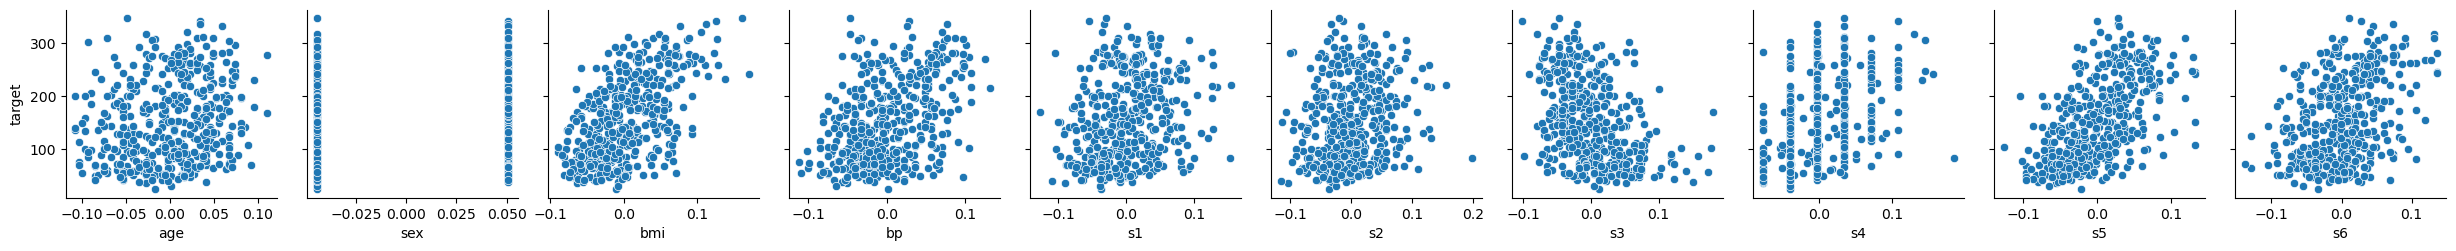

c:\Users\Nath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


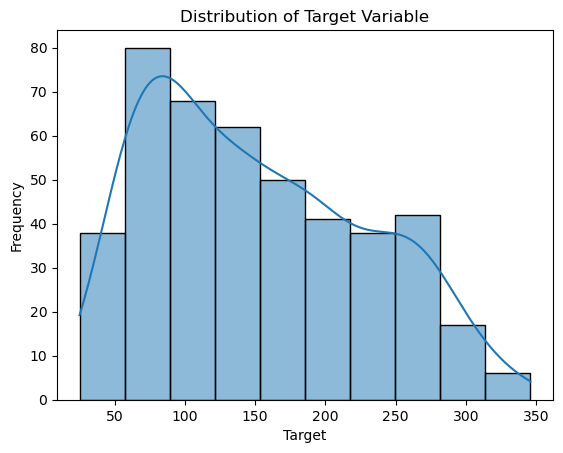

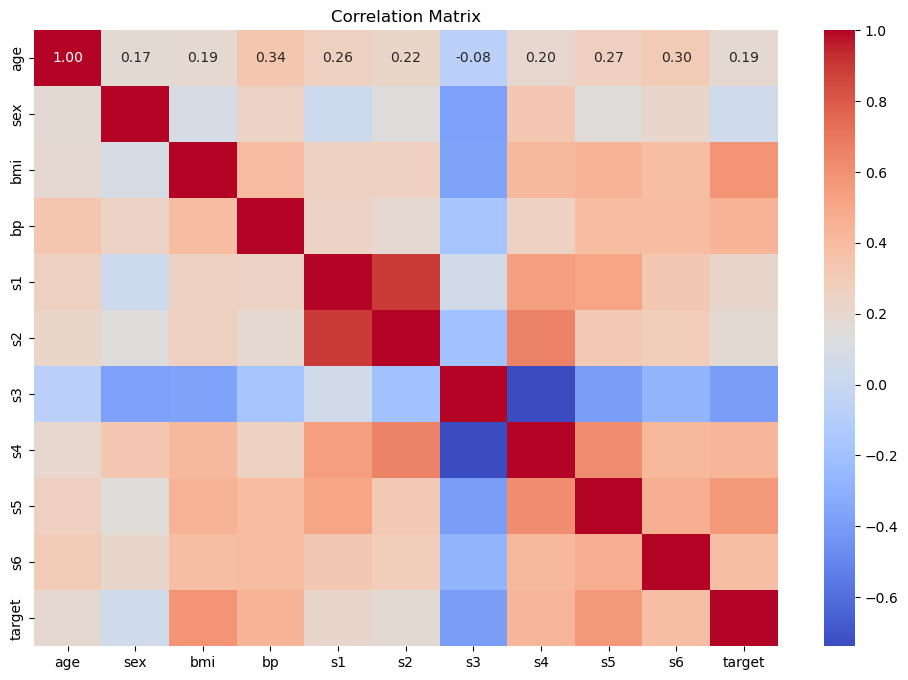

In [18]:
data = dataset.data
target = dataset.target
columns = dataset.feature_names

df = pd.DataFrame(data, columns=columns)
df['target'] = target

sns.pairplot(df, y_vars=['target'], x_vars=columns)
plt.show()

# Distribution plot for target variable
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

# Heatmap to visualize correlations between features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [19]:
# Your code here:
target = dataset['target']
print(target)
print(type(target))
print(target.shape)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64
<class 'pandas.core.series.Series'>
(442,)


Initialize the model in the variable `diabetes_model`

In [20]:
# Your code here:
diabetes_model = LinearRegression()

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [21]:
# Your code here:
diabetes_model.fit(data, target)

LinearRegression()

In [22]:
print(diabetes_model.intercept_)
print(diabetes_model.coef_)

152.13348416289597
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Result should look like this:

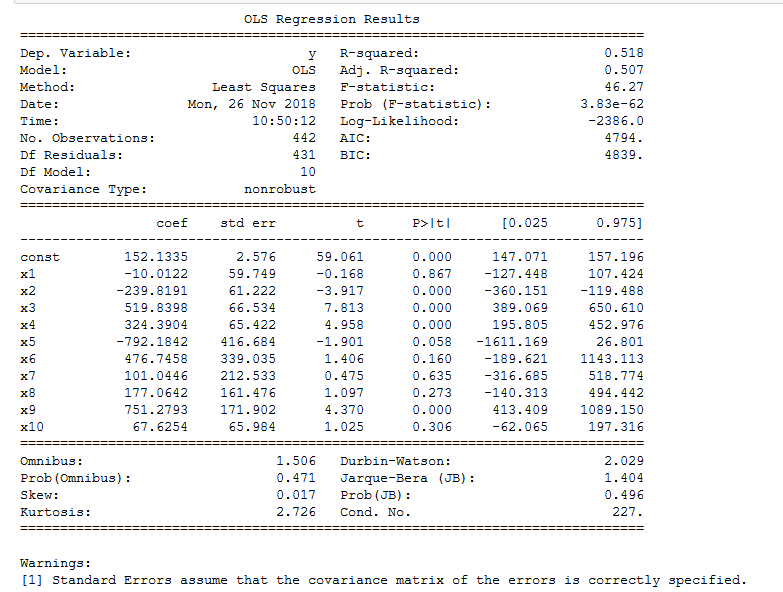

In [23]:
# Your code here:
import statsmodels.api as sm
# Add a constant (intercept) to the predictor variables 
X = sm.add_constant(dataset.data)
# Fit the model using Ordinary Least Squares (OLS) 
diabetes_model = sm.OLS(target, X).fit() 
# Print the intercept and coefficients 
print(diabetes_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           3.83e-62
Time:                        18:25:55   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

- P>|t| (Most important column): This is the p-value for the t-test of each coefficient. A low p-value (typically < 0.05) indicates that you can reject the null hypothesis, which usually states that the coefficient is equal to zero. Significantly low p-values indicate that the predictor variable is statistically significant.

- Null Hypothesis: In simple terms, the null hypothesis is like a baseline assumption that there's no special effect or relationship between the variables you're studying. It's what you'd expect if things were just happening by chance.

- F-statistics: The F-statistic tells us how much better our model explains the data compared to a simpler model that just uses the mean value as a prediction.
A higher F-statistic generally indicates that our model provides a better fit than a simple model. However, the F-statistic needs to be interpreted in the context of its associated p-value.

- P-value or Prob (F-statistic): tells you how likely you are to see your data if the null hypothesis were true. A very low p-value (like the one you have, 3.83e-62) means that it's extremely unlikely your data is just random noise, suggesting your predictors are indeed useful. In simple terms, a very low p-value means that the F-statistic is high enough to confidently say our model is indeed doing a good job.

Conclusion:
- Key Factors: We found that sex, body mass index (bmi), blood pressure (bp), and one specific blood measurement (s5) are critical in predicting the health outcome.
  
- Model Explanation Power: Our model explains just over half of what influences the health outcome, which is pretty good but not perfect.
  
- Model Overall Quality: The overall score (F-statistic) suggests that our model does a significantly better job at predicting the health outcome than random guessing, firmly supported by the near-zero p-value.

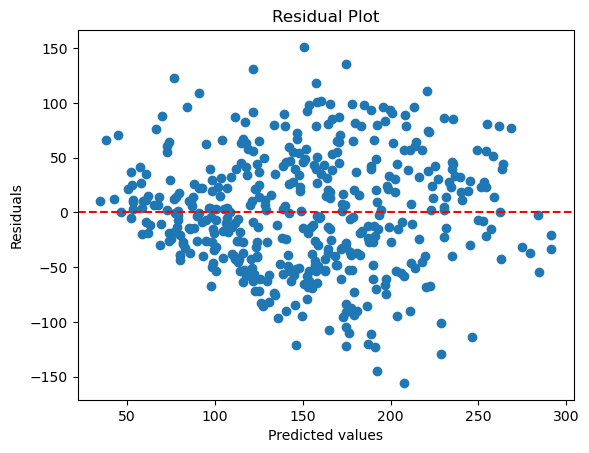

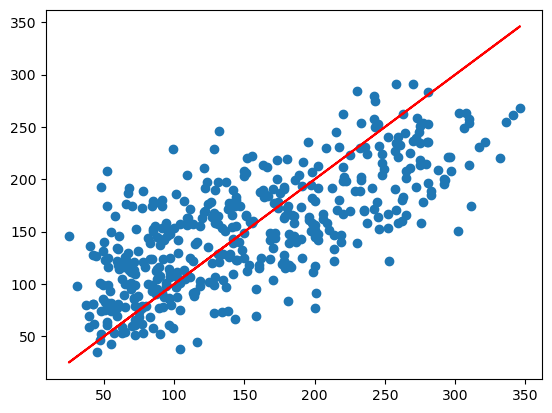

In [24]:
# Predicted values
y_pred = diabetes_model.predict(X)

# Residuals
residuals = target - y_pred

# Plotting residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plotting predicted vs actual values
plt.scatter(target, y_pred)
plt.plot(target, target, color='r') 

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

Dataset description:  
- mpg: miles per gallon
- cylinders: The number of cylinders in the engine.
- displacement: The volume of the engine in cubic inches.
- horsepower: The power output of the engine.
- weight: The weight of the car.
- acceleration: The time it takes for the car to go from 0 to 60 miles per hour.
- year: The model year of the car.

In [50]:
# Your code here:
df = pd.read_csv("../auto-mpg.csv")
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(398, 8)


Look at the first 5 rows using the `head()` function:

In [51]:
# Your code here:
df.head(5)

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


What is the newest model year and the oldest model year?

In [53]:
# Your code here:
newest_model_year = max(df["model_year"])
oldest_model_year = min(df["model_year"])
print('Newest model year', newest_model_year)
print('Oldest model year', oldest_model_year)

Newest model year 82
Oldest model year 70


Check the dataset for missing values and remove all rows containing at least one missing value.

In [54]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [55]:
# Your code here:
df.dropna(axis=0, how="any", inplace=True)
df.shape

(392, 8)

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [56]:
# Your code here:
df["cylinders"].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [57]:
# Your code here:
df.drop("car_name", axis=1, inplace=True)

In [58]:
df

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [59]:
# extract features and labes
X = df.iloc[:, 1:]
print(X.shape)

y = df.iloc[:, 0]
print(y.shape)

(392, 6)
(392,)


In [60]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train", X_train.shape)
print("X_test" ,X_test.shape)
print("y_train" ,y_train.shape)
print("y_test", y_test.shape)

X_train (313, 6)
X_test (79, 6)
y_train (313,)
y_test (79,)


Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [61]:
# Your code here:
auto_model = LinearRegression()


Next, fit the model in the cell below.

In [62]:
# Your code here:
# Perform the fitting
auto_model.fit(X_train, y_train)

intercept = auto_model.intercept_
coef = auto_model.coef_

# Print coefs
print(intercept)
print(coef)

-15.05775858528244
[-0.116173    0.00101347 -0.00227634 -0.00656101  0.06173551  0.76063644]


Intercept and Coefficients:  
- The intercept represents the expected value of the target variable when all input features are zero.
- Each coefficient represents the change in the target variable for a one-unit change in the corresponding input feature, holding all other features constant.

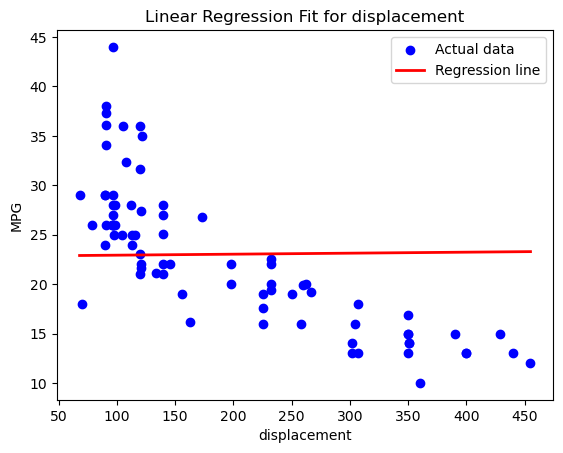

In [63]:

# Assuming we want to plot the result for the 'displacement' variable, which is the second column in X
feature_index = 1  # Index corresponding to 'displacement'
feature_name = X.columns[feature_index]

# Mean values of all features except the chosen one
means = X_test.mean()

# Function to predict MPG using our model with fixed means for other features
def predict_fixed(feature_values, feature_index, means, intercept, coef):
    # Copy the means for all features
    X_fixed = np.tile(means.values, (feature_values.shape[0], 1))
    # Replace the feature column with the actual values we want to predict
    X_fixed[:, feature_index] = feature_values.flatten()
    # Calculate the predicted values using the linear model equation
    return intercept + np.dot(X_fixed, coef)

# Extract the specific feature from the test set
X_test_feature = X_test.iloc[:, feature_index].values.reshape(-1, 1)

# Plotting the results
plt.scatter(X_test_feature, y_test, color='blue', label='Actual data')

# Creating the regression line
x_line = np.linspace(X_test_feature.min(), X_test_feature.max(), 100).reshape(-1, 1)
y_line = predict_fixed(x_line, feature_index, means, intercept, coef)

plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
plt.title(f'Linear Regression Fit for {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('MPG')
plt.legend()
plt.show()

# Challenge 4 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [64]:
# Your code here:
y_pred = auto_model.predict(X_train)
print(y_train.shape, y_pred.shape)

r2_train = r2_score(y_train, y_pred)
print("r2 train score:", r2_train)

(313,) (313,)
r2 train score: 0.8107227953093896


#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_train` data and the predicted `y_test_pred`.

In [65]:
# Your code here:
y_test_pred = auto_model.predict(X_test)
print(y_test.shape, y_test_pred.shape)

r2_test = r2_score(y_test, y_test_pred)
print("r2 test score:", r2_test)

(79,) (79,)
r2 test score: 0.7942349075428591


# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [66]:
# Your code here:
X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.1, random_state=42)
print("X_train", X_train09.shape)
print("X_test" ,X_test09.shape)
print("y_train" ,y_train09.shape)
print("y_test", y_test09.shape)

X_train (352, 6)
X_test (40, 6)
y_train (352,)
y_test (40,)


Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [67]:
# Your code here:
auto_model09 = LinearRegression()
auto_model09.fit(X_train09, y_train09)
print(auto_model09.intercept_)
print(auto_model09.coef_)

-14.551793731860894
[-0.23653029  0.00316396  0.00250662 -0.00663075  0.07263564  0.75032631]


Compute the predicted values and r squared score for our new model and new sample data.

In [68]:
# Your code here:
y_pred09 = auto_model.predict(X_train09)

r2_train09 = r2_score(y_train09, y_pred09)
print("r2 train score:", r2_train09)


r2 train score: 0.8042346937195509


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [69]:
# Your code here:
y_test_pred09 = auto_model.predict(X_test09)

r2_test09 = r2_score(y_test09, y_test_pred09)
print("r2 test score:", r2_test09)

r2 test score: 0.8440571020562744


Yes, the r2 score improved by about 4%, meaning that the model is getting more precise and less prone to overfitting.

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [70]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [71]:
# Your code here:
rfe_model = RFE(auto_model, n_features_to_select=3, verbose=1)

Fit the model and print the ranking

In [72]:
# Your code here:
rfe_model.fit(X_train, y_train)
print(rfe_model.ranking_)

for i, col in enumerate(X_train.columns):
    print(col, rfe_model.ranking_[i])

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
[1 4 3 2 1 1]
cylinders 1
displacement 4
horse_power 3
weight 2
acceleration 1
model_year 1


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [74]:
# Your code here:
# Let's keep features with a rank of 1 (most important)

X_reduced = df[["cylinders", "acceleration", "model_year"]]
y_reduced = df[["mpg"]]
print(X_reduced.shape)
print(y_reduced.shape)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

(392, 3)
(392, 1)


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [75]:
# Your code here:
auto_model_reduced = LinearRegression()
auto_model_reduced.fit(X_train_reduced, y_train_reduced)

print(auto_model_reduced.intercept_)
print(auto_model_reduced.coef_)

[-17.44617949]
[[-3.08104753 -0.04749391  0.76994105]]


In [78]:
y_pred_train_reduced = auto_model_reduced.predict(X_train_reduced)
y_pred_test_reduced = auto_model_reduced.predict(X_test_reduced)

r2_train_reduced = r2_score(y_train_reduced, y_pred_train_reduced)
r2_test_reduced = r2_score(y_test_reduced, y_pred_test_reduced)

print("r2 train score:", r2_train_reduced)
print("r2 test score:", r2_test_reduced)

r2 train score: 0.714483909220985
r2 test score: 0.7149033079956759


It's worse than before !! :(